# Data Exploration

### Notebook Overview
* [Imports](#chapter0)
* [Image Analysis](#chapter1)
    * [Plotting an Example](#section_1_1)
    * [Overall Analysis](#section_1_2)

* [Video Analysis](#chapter2)
    * [Abschnitt 2.1](#section_2_1)
        * [Unterabschnitt 2.1.1](#sub_section_2_1_1)
        * [Unterabschnitt 2.1.2](#sub_section_2_1_2)


## Imports <a class="anchor" id="chapter0"></a>

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualizations and Image Processing
import glob 
import cv2 
import matplotlib.pylab as plt 
import plotly.express as px

# Sonstige
import random


## Image Analysis <a class="anchor" id="chapter1"></a>


### Plotting an Example <a id="section_1_1"></a>


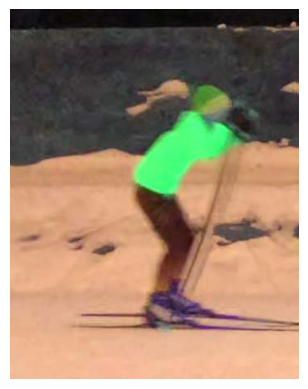

In [2]:
path_to_images = "/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/pictures/lateral/"
skier_images = glob.glob(path_to_images + "*.jpg")

# plot a random lateral image 
example_image = cv2.imread(skier_images[random.randint(0,len(skier_images)-1)])

fig, ax = plt.subplots()
ax.imshow(example_image)
ax.axis("off")
plt.show()

### Overall Analysis <a id="section_1_2"></a>

In [3]:
shapes = []
resolutions = []
color_distributions = []


for image in skier_images:
    current_image = cv2.imread(image)

    # Extract shape of image
    shape = current_image.shape
    shapes.append(shape)

    # Extract the resolution of the image
    resolution = current_image.shape[:2]
    resolutions.append(resolution)

    # Extract colordistribution
    color_distribution = np.bincount(current_image.flatten(), minlength=256)
    color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)
    


In [4]:
fig = px.scatter(x=resolutions[:, 0], y=resolutions[:, 1], title="Distribution of Image Resolutions")

fig.update_layout(
    xaxis_title="Width (pixels)",
    yaxis_title="Height (pixels)",
    showlegend=False,
    hovermode="closest",
    width=600,
    height=500,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

fig.show()

## Video Analysis <a class="anchor" id="chapter2"></a>

In [35]:
def check_video(video_path):

    # open video
    cap = cv2.VideoCapture(video_path)

    # Check if the video file was successfully opened
    if not cap.isOpened():
        print("Error: Unable to open video file")
        exit()

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    ret, frame = cap.read()

    return total_frames, fps, frame

In [2]:
path_to_videos = "/Volumes/ThesisUSB/AVP XC Skiing Data/Skating 2-1 armswing/videos/lateral/"
skier_videos = glob.glob(path_to_videos + "*.[mM][pP]4") + glob.glob(path_to_videos + "*.[mM][oO][vV]")

In [38]:
total_frames_list = []
fps_list = []
resolutions_list = []

for video in skier_videos:
    total_frames, fps, frame = check_video(video)
    total_frames_list.append(total_frames)
    fps_list.append(fps)
    resolutions_list.append(frame.shape)


In [45]:
video_info_df = pd.DataFrame({"total_frames": total_frames_list, "fps": fps_list, "resolution": resolutions_list})
video_info_df["duration"] = video_info_df.total_frames / video_info_df.fps 
video_info_df

,total_frames,fps,resolution,duration
0,195,29.924855,"(1080, 1920, 3)",6.516322
1,225,29.946141,"(1080, 1920, 3)",7.513489
2,225,60.000000,"(2160, 3840, 3)",3.750000
3,168,25.000000,"(2160, 3840, 3)",6.720000
4,209,30.000000,"(1080, 1920, 3)",6.966667
5,155,29.970030,"(1080, 1920, 3)",5.171833
6,156,25.000000,"(2160, 3840, 3)",6.240000
7,237,30.028043,"(1080, 1920, 3)",7.892622
8,198,30.000000,"(1080, 1920, 3)",6.600000
9,252,30.000000,"(1080, 1920, 3)",8.400000
